In [36]:
import cv2
import pandas as pd
from PIL import Image

from collections import namedtuple

from sklearn.model_selection import train_test_split

# import create_tf_record
# import imp  
# imp.reload(create_tf_record)  
from create_tf_record import *

In [25]:
df = pd.read_csv('logos/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt', 
                   delimiter=' ', header=None, index_col=False,
                   names=['filename', 'label', 'class_subset', 'xmin', 'ymax', 'xmax', 'ymin'])\
                .drop(['class_subset'], axis=1).drop_duplicates()

df.shape

(1261, 6)

In [26]:
df.head()

,filename,label,xmin,ymax,xmax,ymin
0,144503924.jpg,Adidas,38,12,234,142
1,2451569770.jpg,Adidas,242,208,413,331
2,390321909.jpg,Adidas,13,5,89,60
3,4761260517.jpg,Adidas,43,122,358,354
4,4763210295.jpg,Adidas,83,63,130,93


In [42]:
labels = df.label.unique().tolist()
print(len(labels))
labels

27


['Adidas',
 'Apple',
 'BMW',
 'Citroen',
 'Cocacola',
 'DHL',
 'Fedex',
 'Ferrari',
 'Ford',
 'Google',
 'Heineken',
 'HP',
 'Intel',
 'McDonalds',
 'Mini',
 'Nbc',
 'Nike',
 'Pepsi',
 'Porsche',
 'Puma',
 'RedBull',
 'Sprite',
 'Starbucks',
 'Texaco',
 'Unicef',
 'Vodafone',
 'Yahoo']

# Visualization

In [28]:
def draw_boxes(image_name):
    selected_value = df[df.filename == image_name]
    img = cv2.imread('logos/flickr_logos_27_dataset/flickr_logos_27_dataset_images/{}'.format(image_name))
    for index, row in selected_value.iterrows():
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

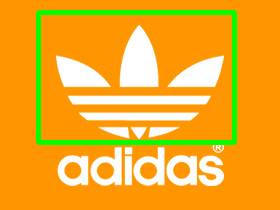

In [29]:
Image.fromarray(draw_boxes('144503924.jpg'))

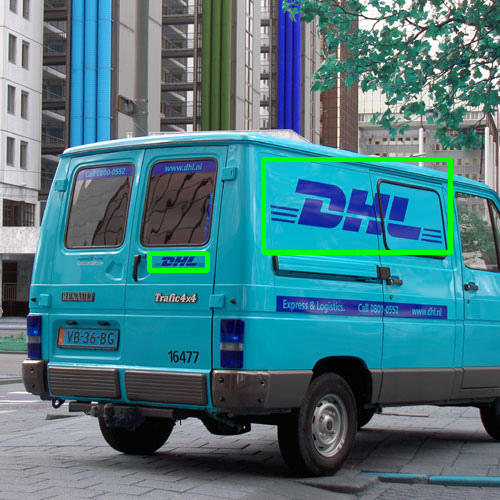

In [30]:
Image.fromarray(draw_boxes('51660552.jpg'))

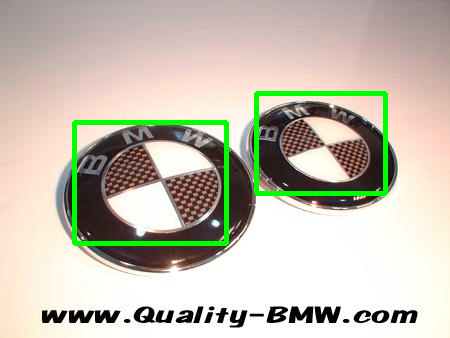

In [31]:
Image.fromarray(draw_boxes('2789664089.jpg'))

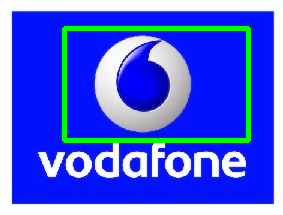

In [32]:
Image.fromarray(draw_boxes('2766852637.jpg'))

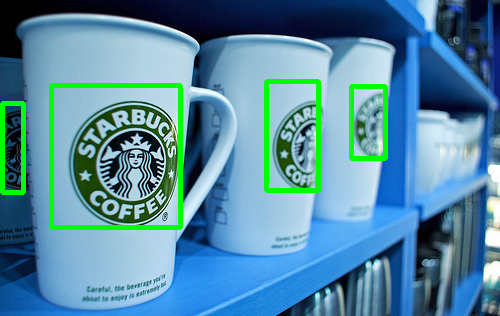

In [33]:
Image.fromarray(draw_boxes('2974365916.jpg'))

# Preparing training and validation data

In [34]:
path = 'logos/flickr_logos_27_dataset/flickr_logos_27_dataset_images'

def write_tf_record(dataframe, output_file):
    data = namedtuple('data', ['filename', 'object'])
    gb = dataframe.groupby('filename')
    grouped = [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]
    
    writer = tf.python_io.TFRecordWriter('data/{}'.format(output_file))
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()

In [37]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [39]:
df_train.shape, df_test.shape

((1008, 6), (253, 6))

In [41]:
# write logos_train.record
write_tf_record(df_train, 'logos_train.record')
# write logos_val.record
write_tf_record(df_test, 'logos_val.record')

In [25]:
temp = list(filter(lambda x: x.filename == '51660552.jpg', grouped))

,filename,label,xmin,ymax,xmax,ymin
1211,51660552.jpg,DHL,149,253,207,270
1212,51660552.jpg,DHL,263,159,450,252


In [45]:
for idx, row in temp[0].object.iterrows():
#     print(row)
    print(row['xmin'], row['xmax'])

149 207
263 450


In [9]:
df[df.filename == '3276332721.jpg']

,filename,label,xmin,ymax,xmax,ymin


In [18]:
df[df.filename == '1075391489.jpg']

,filename,label,xmin,ymax,xmax,ymin
2416,1075391489.jpg,Nbc,2,4,77,58


In [4]:
def draw_boxes(image_name):
    selected_value = data[data.filename == image_name]
    img = cv2.imread('logos/flickr_logos_27_dataset/flickr_logos_27_dataset_images/{}'.format(image_name))
    for index, row in selected_value.iterrows():
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

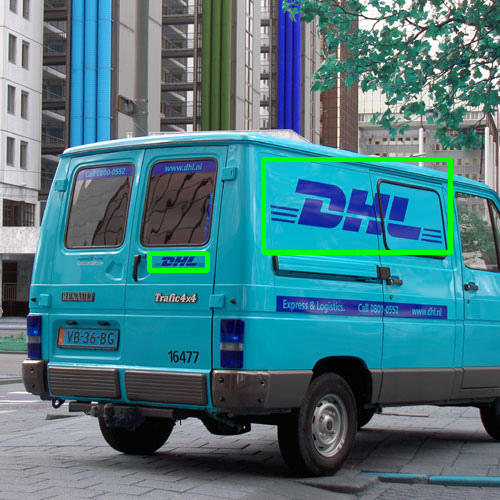

In [8]:
Image.fromarray(draw_boxes('51660552.jpg'))

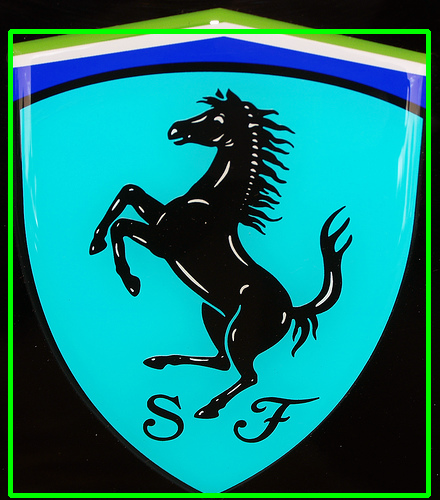

In [10]:
Image.fromarray(draw_boxes('165133120.jpg'))